<a href="https://colab.research.google.com/github/JahnviBhandari/ML-powered-Resume-Analyzer/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/drive/MyDrive/DATA/UpdatedResumeDataSet.csv')

In [10]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [12]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [13]:
data.shape

(962, 2)

In [14]:
data.columns

Index(['Category', 'Resume'], dtype='object')

In [15]:
data.nunique()

,0
Category,25
Resume,166


In [16]:
data.isnull().sum()

,0
Category,0
Resume,0


In [17]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [18]:
student = data.drop(columns = ['Resume'])

In [19]:
student.head()

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science


In [20]:
corelation = student.select_dtypes(include = 'number').corr()

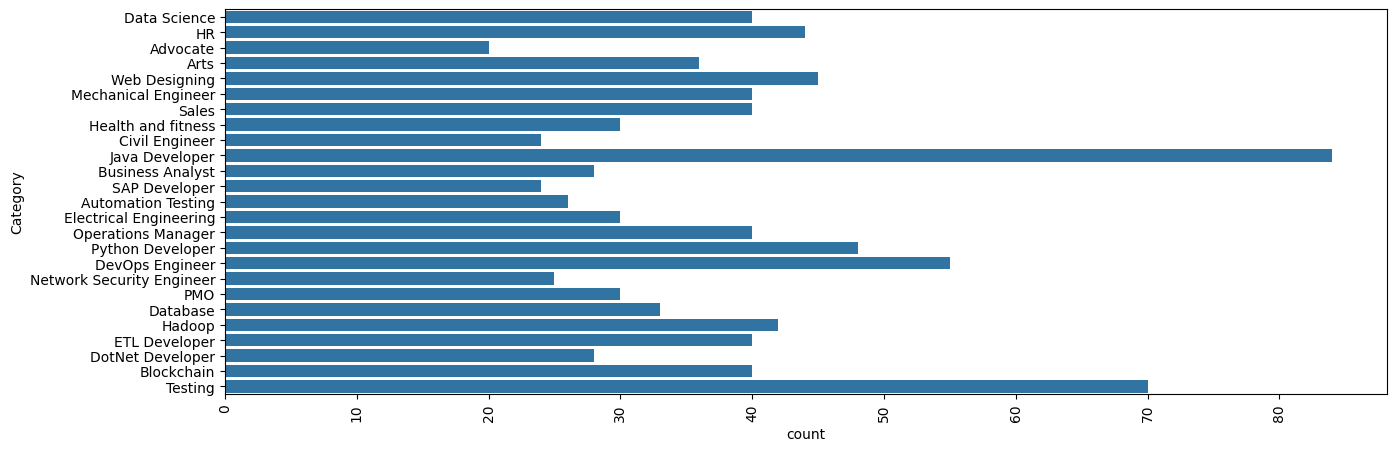

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data['Category'])
plt.xticks(rotation = 90)
plt.show()

In [22]:
counts=data['Category'].value_counts()
labels=counts.index

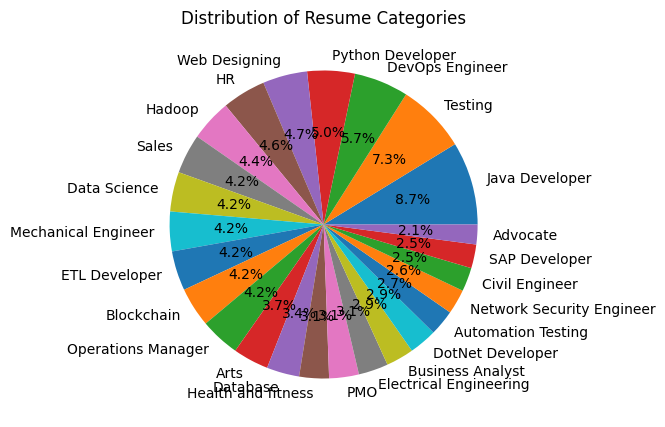

In [23]:
counts=data['Category'].value_counts()
labels=counts.index

plt.figure(figsize=(15,5))
plt.pie(counts, labels=labels,autopct='%1.1f%%')
plt.title("Distribution of Resume Categories")
plt.show()

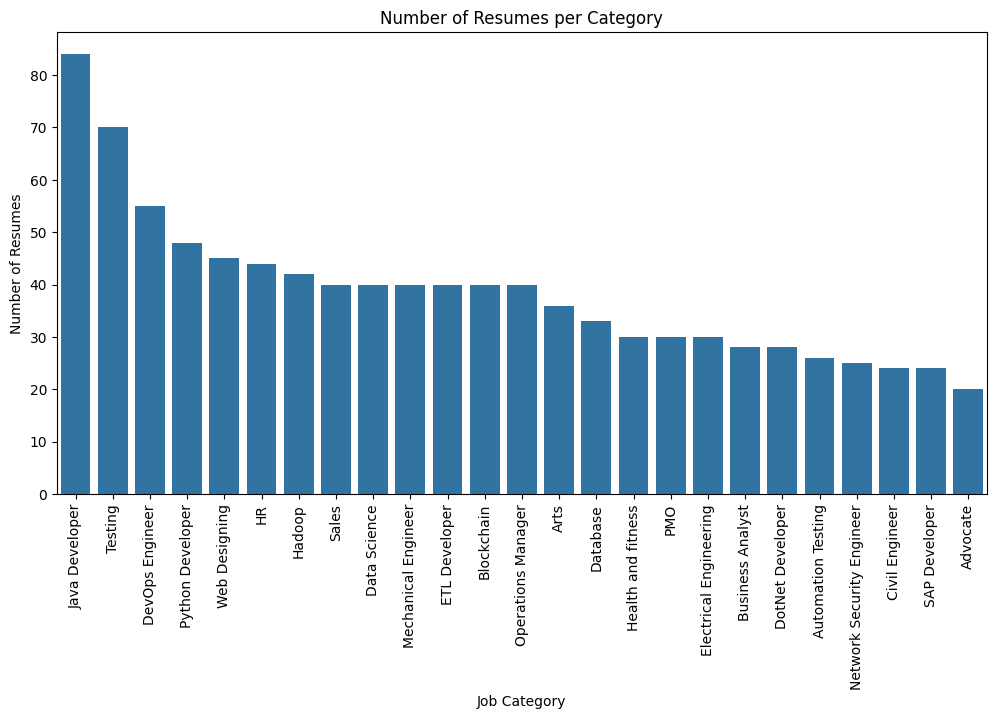

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Resumes per Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Resumes')
plt.show()


In [24]:
import pandas as pd

resumeDataSet = pd.read_csv('/content/drive/MyDrive/DATA/UpdatedResumeDataSet.csv')


In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
!pip install wordcloud


In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [30]:
resumeDataSet['cleaned_resume'] = ''

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""

for i in range(0, 160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

resumeDataSet['lemmatized_resume'] = resumeDataSet['cleaned_resume'].apply(lemmatize_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(resumeDataSet['lemmatized_resume']).toarray()


In [33]:
y = resumeDataSet['Category']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9844559585492227
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       0.86      1.00      0.92        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         